### Understanding the structure of the data


#### a*. Describe types of summaries for continuous vs categorical data

*What information is presented e.g. min, max, median for continuous variables?*

*What are the limits of this information.*

*e.g. can we infer the presence of outliers?*

*Can we draw any conclusion on the type of distribution?*

*For categorical data, what properties should it have to be informative?*

*e.g. do constant (near-constant) features carry any information?*



**Answer:**

Continuous data can be summarized by min, max, median, mean, standard deviation, skewness, kurtosis, etc. This should be a summary of the data set. 

min and max are affected by the outliers, as they are extreme outliers themselves. 

min, max and median is not affected by the precise value of each sample data and hence is not often used in tests.

Categorical data should have a large number of unique values to be informative, so that we can use one-hot encoding to encode them.

Constant features do not carry any information, near-constant features may carry some information.


#### b*. How do we identify outliers for continuous data? What about categorical features?

Discuss visualisation approaches combined with standardisation (Z transforms).

Do extreme outliers influence the identification of outliers, using a Z transformation (e.g. through , ).

For categorical features, how do we link the frequency of entries to the “usefulness” of a feature?


**Answer:**

Visualisation helps to identify outliers, using eye-balling method. Although using Z test should be a more quantitative way of identifying outliers. Z-score is a measure of how many standard deviations below or above the population mean a raw score is. For example for a z-score of 3, the probability of getting a value larger than 3 is 0.001 (significance level).

Z-transformation is also called standardization. It is a way to transform the data to have mean 0 and standard deviation 1.

Categorical features need to have a large number of unique values to be informative, meaning that one value is expected to apprear several times (relatively higher frequency) so that we can use one-hot encoding to encode them.

#### c**. How do we deal with missing values?

*Focussing on features (predictors), missing values can be inferred either by single-value imputation (e.g. median, minimum, maximum) or by model-imputation.*

*Whenever we impute values, we acknowledge that the reliability of the process is tightly linked to the quality of the data. Therefore, it is essential to check and compare the distributions prior and after the imputation.*

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fea_1 = np.random.normal(50, 10, 200)

fea_2 = fea_1 * 2 + np.random.normal(0, 5, 200)

# Map fea_1 values to "lo", "me", or "hi"

bins = [-np.inf, 45, 55, np.inf]

labels = ["lo", "me", "hi"]

fea_3 = pd.cut(fea_1, bins=bins, labels=labels)

data = pd.DataFrame({'fea_1': fea_1, 'fea_2': fea_2, 'fea_3': fea_3})

# Introduce missing values in feature 1.

missing_indices = np.random.choice(200, 40, replace=False)

data.loc[missing_indices, 'fea_1'] = np.nan

In [3]:
data

,fea_1,fea_2,fea_3
0,46.657397,96.006040,me
1,NaN,79.278624,lo
2,65.520905,128.918972,hi
3,NaN,79.363059,lo
4,34.715894,59.284141,lo
...,...,...,...
195,52.748592,110.551603,me
196,58.270224,118.896605,hi
197,47.748587,107.908900,me
198,50.544381,101.238526,me


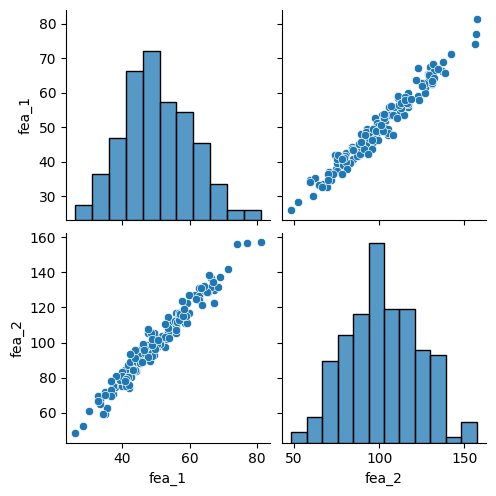

In [4]:
sns.pairplot(data)
plt.show()

In [5]:
data[["fea_1","fea_2"]].corr()

,fea_1,fea_2
fea_1,1.000000,0.978073
fea_2,0.978073,1.000000


In [6]:
### Single Value imputation
data_s = data.copy()
data_s['fea_1'].fillna(data['fea_1'].mean(), inplace=True)
data_s['fea_2'].fillna(data['fea_2'].mean(), inplace=True)

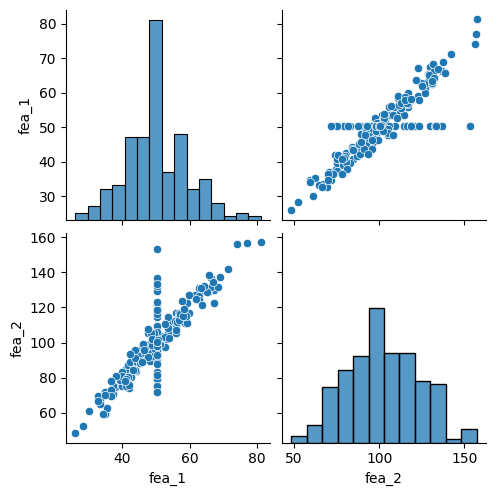

In [7]:
sns.pairplot(data_s)
plt.show()

In [8]:
data_s[["fea_1","fea_2"]].corr()

,fea_1,fea_2
fea_1,1.000000,0.877114
fea_2,0.877114,1.000000


In [9]:
### 

In [10]:
### Model Value imputation

from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Split data into complete and incomplete subsets
complete_data = data.dropna(subset=['fea_1'])
incomplete_data = data[data['fea_1'].isna()]

# Define features and target variable
features = ['fea_2']
target = 'fea_1'

# Split the complete data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(complete_data[features], complete_data[target], test_size=0.2, random_state=42)

# Initialize and train the model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

incomplete_data["fea_1"] = model.predict(incomplete_data[features]).tolist()

data_m = pd.concat([complete_data, incomplete_data])

/var/folders/ry/r28_vw1507xg9nf1c8mtsr500000gn/T/ipykernel_6369/2384781501.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_data["fea_1"] = model.predict(incomplete_data[features]).tolist()


In [11]:
incomplete

NameError: name 'incomplete' is not defined

In [ ]:
data_m[["fea_1","fea_2"]].corr()

,fea_1,fea_2
fea_1,1.000000,0.977844
fea_2,0.977844,1.000000


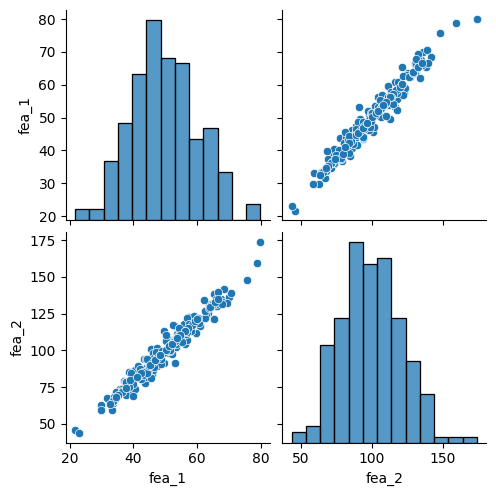

In [ ]:
sns.pairplot(data_m[["fea_1","fea_2"]])
plt.show()